# Grover's algorithm

References for Grover algorithm:
    
[Qiskit text book on Grover algorithm](https://learn.qiskit.org/course/introduction/grovers-search-algorithm)

* analogy of phone book and looking for name having phone number - unstructured search (for structured/sorted databased binary search has logaritmic complexity, so good enough)
* $\sqrt{N}$ complexity so **quadratic improvement** over classical algorithm (simply going one by one and checking)
* If we can make a problem look like a database search problem, then we can use Grover algorithm to solve it => quite generic algorithm.
* Examples:
    * looking for Sudoku solution
    * Boolean satisfiability problem (known as 'SAT')

### Let's explore a 3 qubit example (8 possible states) with our winner (searched item) being $|110>$ = $|6>$:

In [1]:
from qiskit import *

oracle = QuantumCircuit(3, name="oracle")
oracle.x(0)
oracle.h(2)
oracle.ccx(0, 1, 2)
oracle.x(0)
oracle.h(2)

oracle.draw()


┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘  │  └───┘
q_1: ───────■───────
     ┌───┐┌─┴─┐┌───┐
q_2: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [2]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(7, 2**3)
state = state.evolve(oracle)
state.draw("latex")


<IPython.core.display.Latex object>

In [9]:
from qiskit import *

oracle = QuantumCircuit(3, name="oracle")
oracle.x(0)
oracle.ccz(0, 1, 2)
oracle.x(0)

oracle.draw()


q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_2: ──────■──────

In [10]:
state = Statevector.from_int(5, 2**3)
state = state.evolve(oracle)
state.draw("latex")


<IPython.core.display.Latex object>

In [11]:
diffuser = QuantumCircuit(3, name="diffuser")
diffuser.h([0, 1, 2])
diffuser.x([0, 1, 2])
diffuser.barrier()
diffuser.h(2)
diffuser.ccx(0, 1, 2)
diffuser.h(2)
diffuser.barrier()
diffuser.x([0, 1, 2])
diffuser.h([0, 1, 2])
diffuser.draw()


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

In [12]:
grover = QuantumCircuit(3, 3)
grover.h([0, 1, 2])
grover.append(oracle, [0, 1, 2])
grover.append(diffuser, [0, 1, 2])
grover.measure([0, 1, 2], [0, 1, 2])

grover.draw()


┌───┐┌─────────┐┌───────────┐┌─┐      
q_0: ┤ H ├┤0        ├┤0          ├┤M├──────
     ├───┤│         ││           │└╥┘┌─┐   
q_1: ┤ H ├┤1 oracle ├┤1 diffuser ├─╫─┤M├───
     ├───┤│         ││           │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2        ├┤2          ├─╫──╫─┤M├
     └───┘└─────────┘└───────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════╩══╩══╩═
                                   0  1  2

In [13]:
import math

num_iterations = math.pi * math.sqrt(8) / 4
print(num_iterations)


2.221441469079183


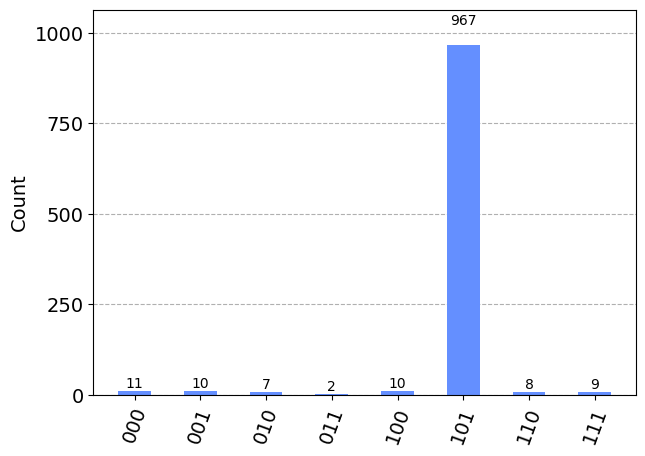

In [14]:
from qiskit.visualization import plot_histogram

grover = QuantumCircuit(3, 3)
grover.h([0, 1, 2])

for i in range(2):
    grover.append(oracle, [0, 1, 2])
    grover.append(diffuser, [0, 1, 2])

grover.measure([0, 1, 2], [0, 1, 2])

backend = Aer.get_backend("qasm_simulator")
job = execute(grover, backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)


## Exercise:
Construct analogical Grover circuit to look for state $|101>$

## Exercise:
* Construct Grover circuit looking for state |1001> out of 16 possible 4-qubit states.
* Hint: to construct oracle and diffuser you can use mct() (multi-controlled-toffoli) gate in Qiskit.
* What is the optimal number of Grover iterations?

# Qiskit provides us a ready implementation of Grover algorithm, so you need only the oracle ;)
More here: https://qiskit.org/ecosystem/algorithms/tutorials/06_grover.html

In [10]:
# Let's use the first example above with 3 qubits and looking for |110>

oracle = QuantumCircuit(3, name="oracle")
oracle.x(0)
oracle.h(2)
oracle.ccx(0, 1, 2)
oracle.x(0)
oracle.h(2)

good_state = ["110"]


In [23]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance
from qiskit_algorithms import Grover, AmplificationProblem
from qiskit.primitives import Sampler

problem = AmplificationProblem(oracle=oracle, is_good_state=good_state)

grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Result type:", type(result))
print()
print("Success!" if result.oracle_evaluation else "Failure!")
print("Top measurement:", result.top_measurement)
print("Probability:", result.max_probability)


Result type: <class 'qiskit_algorithms.amplitude_amplifiers.grover.GroverResult'>

Success!
Top measurement: 110
Probability: 0.7812499999999987


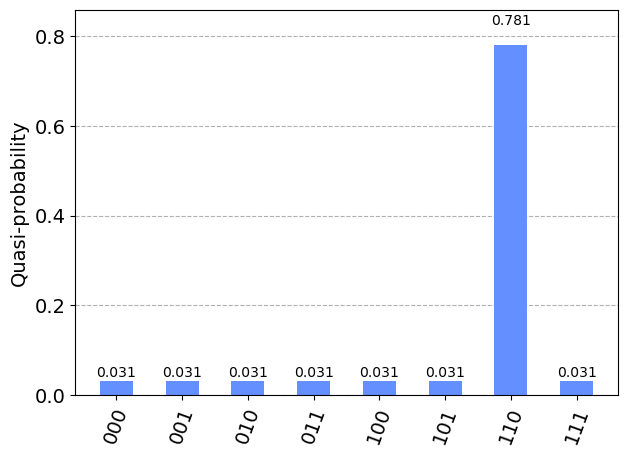

In [27]:
plot_histogram(result.circuit_results)


The results obtained is of type `GroverResult`:

In [16]:
print(result)


{   'assignment': '110',
    'circuit_results': [   {   '000': 0.0312499999999999,
                               '001': 0.0312499999999999,
                               '010': 0.0312499999999999,
                               '011': 0.0312499999999999,
                               '100': 0.0312499999999999,
                               '101': 0.0312499999999999,
                               '110': 0.7812499999999983,
                               '111': 0.0312499999999999}],
    'iterations': [1],
    'max_probability': 0.7812499999999983,
    'oracle_evaluation': True,
    'top_measurement': '110'}


* `oracle` can be a QuantumCircuit object is the oracle is provided in this form
* then the `is_good_state` function needs to be implemented and provided 

And even simpler method using Statevector (no need to be able to construct the oracle)

In [24]:
oracle = Statevector.from_label("110")
problem = AmplificationProblem(oracle, is_good_state=["110"])
grover = Grover(sampler=Sampler())
result = grover.amplify(problem)
print("Top measurement:", result.top_measurement)
print("Probability:", result.max_probability)


Top measurement: 110
Probability: 0.7812499999999987


## Exercise

Learn about the DIMACS-CNF format representation for SAT (satisfability) problems: https://qiskit.org/ecosystem/algorithms/tutorials/07_grover_examples.html

Write a DIMACS-CNF file, construct oracle from it and use Grover algorithm to find solution to the following real life problem:

There are 5 friends: Alice, Bob, Charlie, Dave and Eve
Each friend can either come to the party or not come to the party
The problem is to decide which friends to invite such that:
- Alice and Bob must come to the party together or not at all
- Charlie must come to the party only if Dave comes to the party
- Eve cannot come to the party if Alice or Bob come to the party
- At least one of them come to the party

